<a href="https://colab.research.google.com/github/BalajiSathish/Guvi_DSC/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library 

In [68]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Load Dataset


In [69]:
data = pd.read_csv('/content/cancer.csv')
print('Dataset :',data.shape)
data.info()
data.head()

Dataset : (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perime

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# EDA

In [70]:
data.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [71]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [72]:
data = data.dropna(axis='columns')

In [73]:
data.describe(include="O")

,diagnosis
count,569
unique,2
top,B
freq,357


In [74]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [75]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [76]:
dig_uni = data.diagnosis.unique()

In [77]:
dig_uni

array(['M', 'B'], dtype=object)

# Data Visualization

In [78]:
import plotly.express as px
import plotly.graph_objects as go
sns.set_style('darkgrid')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


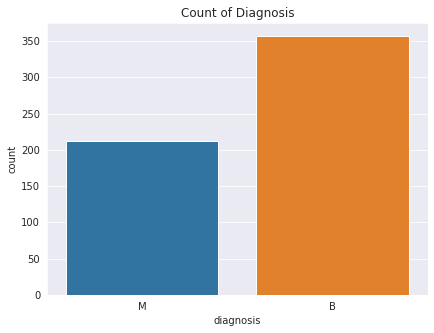

In [79]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist( data.diagnosis)
plt.title('Count of Diagnosis')
sns.countplot('diagnosis', data=data);

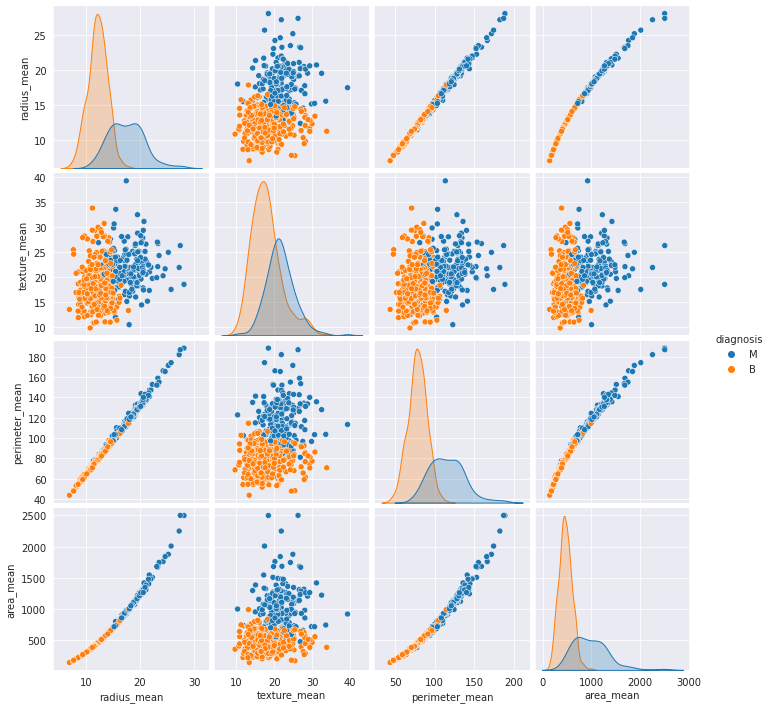

In [80]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(data[cols], hue="diagnosis")
plt.show()

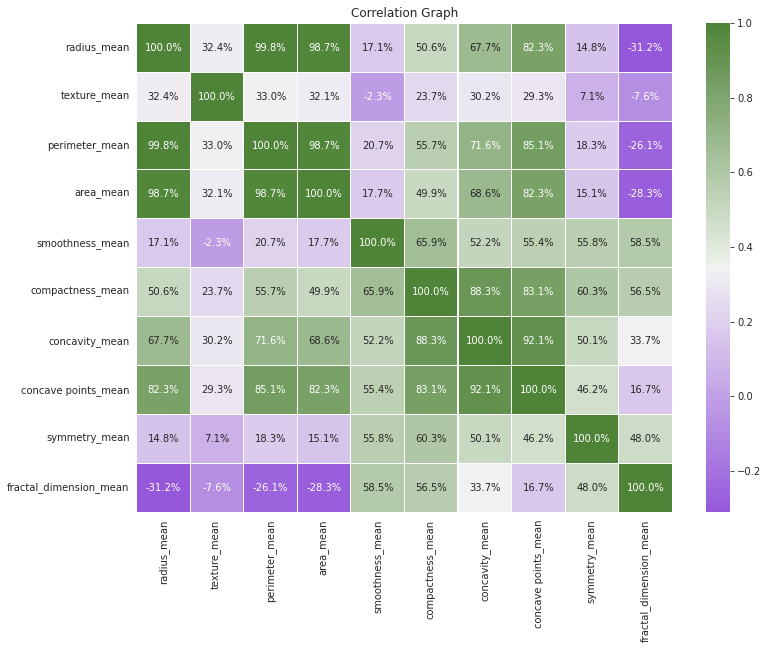

In [83]:
data = data[['radius_mean','texture_mean','perimeter_mean','area_mean', 'smoothness_mean','diagnosis','compactness_mean','concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']] #Subsetting the data
cor = data.corr() #Calculate the correlation of the above variables

plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(cor, annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

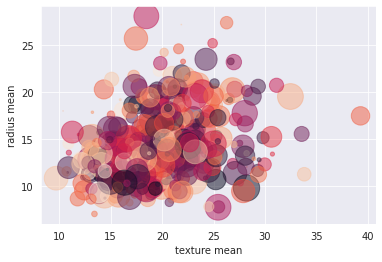

In [84]:
size = len(data['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(data['texture_mean'], data['radius_mean'], s=area, c=colors, alpha=0.5)

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
labelencoder_Y = LabelEncoder()
data.diagnosis = labelencoder_Y.fit_transform(data.diagnosis)

In [87]:
data.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,diagnosis,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.8,1001.0,0.11840,1,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.9,1326.0,0.08474,1,0.07864,0.0869,0.07017,0.1812,0.05667


# Model Implementation

## Train Teat Split

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [110]:
Y = data['diagnosis']
X = data.drop(columns=['diagnosis'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=15)

In [111]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (455, 10)
Y train shape:  (455,)
X test shape:  (114, 10)
Y test shape:  (114,)


In [112]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Import ML Model

In [126]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

### Check Model Accuracy, Error and Validation

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve
from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold

In [113]:
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True),n_jobs=-1))

# We train model
svmcla.fit(X_train, Y_train)

# We predict target values
Y_predict2 = svmcla.predict(X_test)

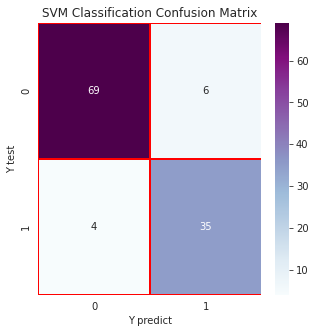

In [114]:
# The confusion matrix
svmcla_cm = confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [115]:
# Test score
score_svmcla = svmcla.score(X_test, Y_test)
print(score_svmcla)

0.9122807017543859


In [116]:
#precision and recall
average_precision = average_precision_score(Y_test, Y_predict2)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.80


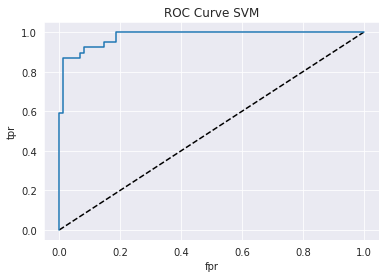

In [119]:
Y_predict2_proba = svmcla.predict_proba(X_test)
Y_predict2_proba = Y_predict2_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict2_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve SVM')
plt.grid(True)

In [122]:
def model_building(model, X_train, X_test, y_train, y_test):
    """
    
    Model Fitting, Prediction And Other stuff
    return ('score', 'accuracy_score', 'predictions' )
    """
    
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    
    return (score, accuracy, predictions)   

In [139]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]
score, accuracy, predictions = model_building(SVC(), X_train, X_test,Y_train, Y_test )
    
print("\n\nClassification Report of SVC ", "\n")
    
print(classification_report(Y_test, predictions))

df_prediction.append([score, accuracy, "{0:.2%}".format(accuracy)])
    



Classification Report of SVC  

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        75
           1       0.89      0.85      0.87        39

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



In [142]:
cv_score = cross_validate(SVC(), X, Y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

pd.DataFrame(cv_score).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,3.0,0.032186,0.016162,0.021055,0.022917,0.024780,0.037752,0.050724
score_time,3.0,0.013510,0.006601,0.008314,0.009797,0.011279,0.016108,0.020938
test_r2,3.0,0.466781,0.229526,0.212925,0.370340,0.527755,0.593709,0.659664
train_r2,3.0,0.481331,0.078156,0.426559,0.436580,0.446600,0.508716,0.570833
test_neg_mean_squared_error,3.0,-0.124701,0.053841,-0.184211,-0.147368,-0.110526,-0.094946,-0.079365
train_neg_mean_squared_error,3.0,-0.121254,0.018344,-0.134211,-0.131749,-0.129288,-0.114776,-0.100264


In [145]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']

targeted_feature = 'diagnosis'

In [146]:
model.fit(data[prediction_feature], data[targeted_feature])
    
    # score = model.score(X_train, y_train)    
    
predictions = model.predict(data[prediction_feature])    
accuracy = accuracy_score(predictions, data[targeted_feature])
print("\nFull-Data Accuracy:", round(accuracy, 2))
print("Cross Validation Score of SVC","\n")
kFold = KFold(n_splits=5) # define 5 diffrent data folds
    
err = []
    
for train_index, test_index in kFold.split(data):
# print("TRAIN:", train_index, "TEST:", test_index)
# Data Spliting via fold indexes
  X_train = data[prediction_feature].iloc[train_index, :] # train_index = rows and all columns for Prediction_features
  y_train = data[targeted_feature].iloc[train_index] # all targeted features trains
  X_test = data[prediction_feature].iloc[test_index, :] # testing all rows and cols
  y_test = data[targeted_feature].iloc[test_index] # all targeted tests
  # Again Model Fitting
  model.fit(X_train, y_train)
  err.append(model.score(X_train, y_train))
  print("Score:", round(np.mean(err),  2) )


Full-Data Accuracy: 0.89
Cross Validation Score of SVC 

Score: 0.9
Score: 0.89
Score: 0.88
Score: 0.88
Score: 0.88


# Hyper Tunning ML Model

In [134]:
from  sklearn.model_selection import GridSearchCV

In [136]:
model = SVC()


# Tunning Params
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              }
]
gsc = GridSearchCV(model, param_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, Y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9428019323671497

 Best Estinator is 
SVC(C=1000, gamma=0.001)

 Best Parametes are
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
